In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The interval in data is : 91 days 00:00:00
--------------------------------------
The interval in data is : 365 days 00:00:00
--------------------------------------
The interval in data is : 1 days 00:00:00
--------------------------------------
The interval in data is : 0 days 00:30:00
--------------------------------------


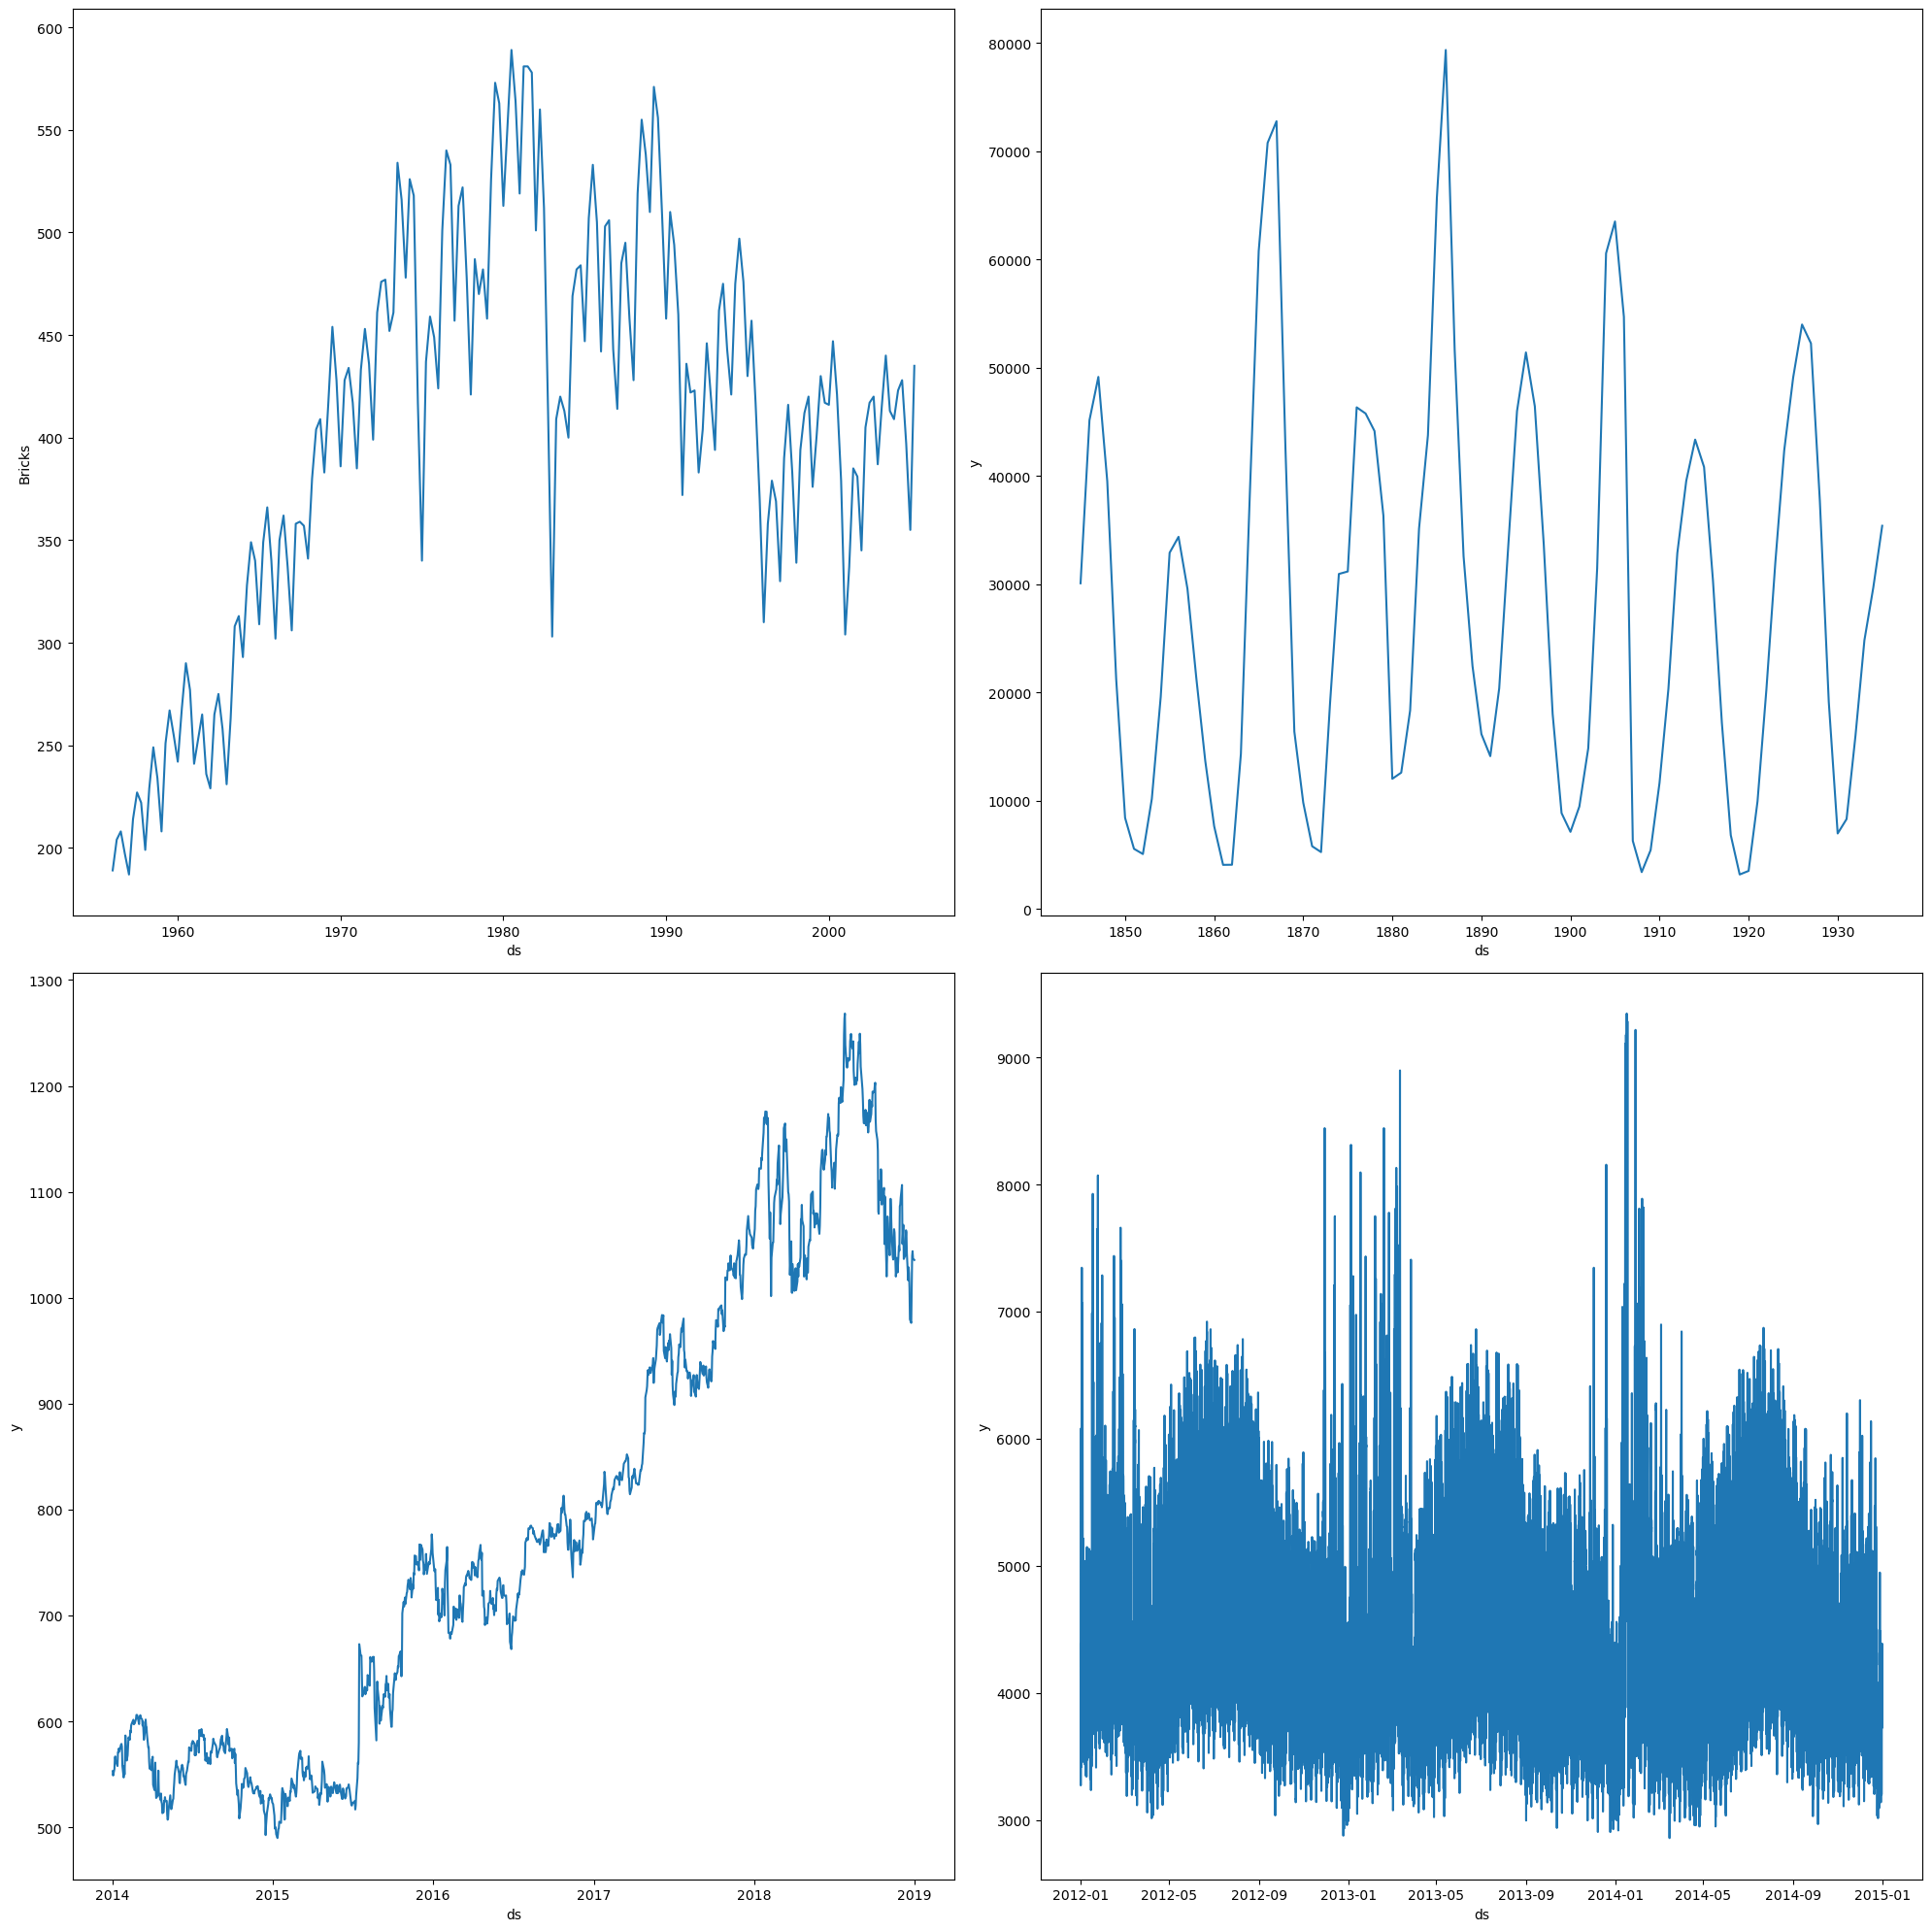

In [39]:
datas = [('aus_production.csv', 'Bricks'), ('pelt.csv', 'y'), ('gafa_stock.csv', 'y') , ('vic_elec.csv', 'y')]
fix, axes = plt.subplots(2,2, figsize=(20,20))


for (file, col), ax in zip(datas, axes.flatten()):
    df = pd.read_csv(f'../DATA/{file}')
    if file == 'gafa_stock.csv':
        df=df[df['unique_id'] == 'GOOG_Close']
    if file == 'pelt.csv':
        df=df[df['unique_id'] == 'lynx']
    if file == 'vic_elec.csv':
        df=df[df['unique_id'] == 'Demand']

    #df.info()
    df['ds'] = pd.to_datetime(df['ds'])
    df.reset_index(inplace=True, drop=True)
    print(f"The interval in data is : {abs(df.loc[0, 'ds'] - df.loc[1, 'ds'])}")
    print('--------------------------------------')
    sns.lineplot(df, x='ds', y=col, ax=ax)
plt.tight_layout()

In [41]:
file = 'gafa_stock.csv'
df = pd.read_csv(f'../DATA/{file}')

In [81]:
filtered_df = df[df['unique_id'].str.contains('Close')]
filtered_df = filtered_df[~filtered_df['unique_id'].str.contains('Adj')]
idx = filtered_df.groupby('unique_id')['y'].idxmax().values
df.iloc[idx]

,unique_id,ds,y
16293,AAPL_Close,2018-10-03,232.070007
17530,AMZN_Close,2018-09-04,2039.510010
18760,FB_Close,2018-07-25,217.500000
20019,GOOG_Close,2018-07-26,1268.329956
